In [105]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
df = pd.read_excel(f'./rawData_230817_v2.xlsx')
#기존 데이터와 합치고 훈련데이터 등 분리

#ohe = pd.get_dummies(df[['자치구(구)']])
#df= pd.concat([df, ohe], axis = 1)
df

,1hr 최대 강수량(mm),일평균 강수량(mm),경사도(˚),해발고도(m),불투수면(%),녹지 면적율(%),하천 면적율(%),복개하천 개수(개),맨홀 개수(개),빗물받이 개수(개),...,자치구(구)_성북,자치구(구)_송파,자치구(구)_양천,자치구(구)_영등포,자치구(구)_용산,자치구(구)_은평,자치구(구)_종로,자치구(구)_중,자치구(구)_중랑,[MAX] 하수관로 비율(%)
0,0.0,0.0,12.033665,146.699945,0.420170,0.009418,0.011652,1,9854,16173,...,0,0,0,0,0,0,1,0,0,0.033333
1,0.0,0.0,12.033665,146.699945,0.420170,0.009418,0.011652,1,9854,16173,...,0,0,0,0,0,0,1,0,0,0.033333
2,0.0,0.0,12.033665,146.699945,0.420170,0.009418,0.011652,1,9854,16173,...,0,0,0,0,0,0,1,0,0,0.033333
3,0.0,0.0,12.033665,146.699945,0.420170,0.009418,0.011652,1,9854,16173,...,0,0,0,0,0,0,1,0,0,0.033333
4,0.0,0.0,12.033665,146.699945,0.420170,0.009418,0.011652,1,9854,16173,...,0,0,0,0,0,0,1,0,0,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10807,17.5,17.5,3.944715,25.698091,0.471826,0.035874,0.134420,0,10269,22313,...,0,0,0,0,0,0,0,0,0,0.450000
10808,0.0,0.0,3.944715,25.698091,0.471826,0.035874,0.134420,0,10269,22313,...,0,0,0,0,0,0,0,0,0,0.100000
10809,0.5,1.5,3.944715,25.698091,0.471826,0.035874,0.134420,0,10269,22313,...,0,0,0,0,0,0,0,0,0,0.105000
10810,5.0,43.5,3.944715,25.698091,0.471826,0.035874,0.134420,0,10269,22313,...,0,0,0,0,0,0,0,0,0,0.160000


In [106]:
X = df.iloc[:,0:36]
y = df.iloc[:,36]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

#하수관로 비율 때문에 사고가 높아지는지? 강수량이 높아지면 사고가 많이 나는지? 그렇게 되면,,, 일일강수량 + 하수관로 비율 (X) => 사고?...(Y)
#y_train = y_train.to_frame()
#y_test = y_test.to_frame()


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10812 entries, 0 to 10811
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1hr 최대 강수량(mm)    10812 non-null  float64
 1   일평균 강수량(mm)       10812 non-null  float64
 2   경사도(˚)            10812 non-null  float64
 3   해발고도(m)           10812 non-null  float64
 4   불투수면(%)           10812 non-null  float64
 5   녹지 면적율(%)         10812 non-null  float64
 6   하천 면적율(%)         10812 non-null  float64
 7   복개하천 개수(개)        10812 non-null  int64  
 8   맨홀 개수(개)          10812 non-null  int64  
 9   빗물받이 개수(개)        10812 non-null  int64  
 10  빗물 펌프 개수(개)       10812 non-null  int64  
 11  자치구(구)_강남         10812 non-null  int64  
 12  자치구(구)_강동         10812 non-null  int64  
 13  자치구(구)_강북         10812 non-null  int64  
 14  자치구(구)_강서         10812 non-null  int64  
 15  자치구(구)_관악         10812 non-null  int64  
 16  자치구(구)_광진         10812 non-null  int64 

**데이터 전처리**

In [109]:
#date format into %Y%m%d and separate
#X_train['날짜'] = pd.to_datetime(X_train['날짜'], format='%Y%m%d')
#X_train['year'] = X_train['날짜'].dt.year
#X_train['month'] = X_train['날짜'].dt.month
#X_train['day'] = X_train['날짜'].dt.day

#change na to np.NaN and drop NA
#y_train[y_train['[MAX] 하수관로 비율(%)'] == 'na', '[MAX] 하수관로 비율(%)'] = np.NaN
#X_train = X_train.dropna(axis=0, how='any')
#y_train = y_train.dropna(axis=0, how='any')

#change Y from object to FLOAT
#y_train['[MAX] 하수관로 비율(%)'].astype('float')

#scaling
def preprocess(X):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    cols = ['1hr 최대 강수량(mm)', '일평균 강수량(mm)', '경사도(˚)', '해발고도(m)', '불투수면(%)', '녹지 면적율(%)', '하천 면적율(%)', '복개하천 개수(개)', '맨홀 개수(개)', '빗물받이 개수(개)', '빗물 펌프 개수(개)']

    stand_scale = StandardScaler()
    minmax_scale = MinMaxScaler()

    X_standard = X.copy()
    X_minmax = X.copy()
    X_standard[cols] = stand_scale.fit_transform(X_standard[cols])
    X_minmax[cols] = minmax_scale.fit_transform(X_minmax[cols])

    return X_standard, X_minmax

X_train_standard, X_train_minmax = preprocess(X_train)

#자치구 one hot encoding
#ohe = pd.get_dummies(X_train[['자치구(구)']])
#X_train= pd.concat([X_train, ohe], axis = 1)

#del X_train_standard['자치구(구)']
#del X_train_minmax['자치구(구)']
#del X_train_standard['날짜']
#del X_train_minmax['날짜']





In [118]:
df_corr = df.corr()
df_corr['[MAX] 하수관로 비율(%)'].sort_values(ascending=False)
related_cols = ['1hr 최대 강수량(mm)','빗물 펌프 개수(개)','해발고도(m)','하천 면적율(%)','빗물받이 개수(개)','복개하천 개수(개)','맨홀 개수(개)','녹지 면적율(%)','불투수면(%)']

[MAX] 하수관로 비율(%)    1.000000
1hr 최대 강수량(mm)      0.212643
일평균 강수량(mm)         0.184225
자치구(구)_광진           0.120412
빗물 펌프 개수(개)         0.112203
자치구(구)_강남           0.070730
하천 면적율(%)           0.056773
빗물받이 개수(개)          0.056462
자치구(구)_노원           0.046755
자치구(구)_강서           0.043274
맨홀 개수(개)            0.039849
녹지 면적율(%)           0.031487
불투수면(%)             0.024319
자치구(구)_동대문          0.021741
자치구(구)_마포           0.019478
자치구(구)_성북           0.018454
자치구(구)_성동           0.018059
자치구(구)_중랑           0.010961
자치구(구)_영등포          0.008919
자치구(구)_강동          -0.006761
자치구(구)_도봉          -0.008404
자치구(구)_서대문         -0.010473
자치구(구)_동작          -0.010687
자치구(구)_서초          -0.011219
자치구(구)_용산          -0.017048
자치구(구)_양천          -0.018150
자치구(구)_금천          -0.022021
자치구(구)_관악          -0.027672
자치구(구)_중           -0.027921
자치구(구)_구로          -0.030276
자치구(구)_송파          -0.030783
경사도(˚)             -0.035814
자치구(구)_종로          -0.037925
복개하천 개수(개)         -0.041824
자치구(구)_강북     

## **전처리 v2**

In [90]:
def preprocess(X_train, y_train):
  #date format into %Y%m%d and separate
  X_train['날짜'] = pd.to_datetime(X_train['날짜'], format='%Y%m%d')
  X_train['year'] = X_train['날짜'].dt.year
  X_train['month'] = X_train['날짜'].dt.month
  X_train['day'] = X_train['날짜'].dt.day

  #change na to np.NaN and drop NA
  #y_train[y_train['[MAX] 하수관로 비율(%)'] == 'na', '[MAX] 하수관로 비율(%)'] = np.NaN
  #X_train = X_train.dropna(axis=0, how='any')
  #y_train = y_train.dropna(axis=0, how='any')

  #change Y from object to FLOAT
  y_train['[MAX] 하수관로 비율(%)'] = y_train['[MAX] 하수관로 비율(%)'].astype('float')

  #scaling
  from sklearn.preprocessing import StandardScaler, MinMaxScaler
  cols = ['1hr 최대 강수량(mm)','일평균 강수량(mm)' ,'경사도(˚)','해발고도(m)','불투수면(%)','녹지 면적율(%)','하천 면적율(%)','복개하천 개수(개)','맨홀 개수(개)','빗물받이 개수(개)','빗물 펌프 개수(개)']
  stand_scale = StandardScaler()
  minmax_scale = MinMaxScaler()
  X_train_standard = X_train.copy()
  X_train_minmax = X_train.copy()
  X_train_standard[cols] = stand_scale.fit_transform(X_train_standard[cols])
  X_train_minmax[cols]= minmax_scale.fit_transform(X_train_minmax[cols])

  y_train_standard = y_train.copy()
  y_train_minmax = y_train.copy()
  y_train_standard= stand_scale.fit_transform(y_train_standard)
  y_train_minmax= minmax_scale.fit_transform(y_train_minmax)

  #자치구 one hot encoding
  ohe = pd.get_dummies(X_train[['자치구(구)']])
  X_train= pd.concat([X_train, ohe], axis = 1)

  del X_train_standard['자치구(구)']
  del X_train_minmax['자치구(구)']
  del X_train_standard['날짜']
  del X_train_minmax['날짜']

# **raw 전처리**

In [ ]:
#raw
#date format into %Y%m%d and separate
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y%m%d')
df['year'] = df['날짜'].dt.year
df['month'] = df['날짜'].dt.month
df['day'] = df['날짜'].dt.day

#change na to np.NaN and drop NA
df.loc[df['[MAX] 하수관로 비율(%)'] == 'na', '[MAX] 하수관로 비율(%)'] = np.NaN
df = df.dropna(axis=0, how='any')

#change Y from object to FLOAT
df['[MAX] 하수관로 비율(%)'] = df['[MAX] 하수관로 비율(%)'].astype('float')

#scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
cols = ['1hr 최대 강수량(mm)','일평균 강수량(mm)' ,'경사도(˚)','해발고도(m)','불투수면(%)','녹지 면적율(%)','하천 면적율(%)','복개하천 개수(개)','맨홀 개수(개)','빗물받이 개수(개)','빗물 펌프 개수(개)','[MAX] 하수관로 비율(%)']
stand_scale = StandardScaler()
minmax_scale = MinMaxScaler()
df_standard = df.copy()
df_minmax = df.copy()
df_standard = stand_scale.fit_transform(df_standard[cols])
df_minmax= minmax_scale.fit_transform(df_minmax[cols])

#자치구 one hot encoding
ohe = pd.get_dummies(df[['자치구(구)']])
df= pd.concat([df, ohe], axis = 1)

df

# **파이프라인**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the data and split into X and y
df = pd.read_excel(f'./rawData_230817_v2.xlsx')

related_cols = ['1hr 최대 강수량(mm)','빗물 펌프 개수(개)','해발고도(m)','하천 면적율(%)','빗물받이 개수(개)','복개하천 개수(개)','맨홀 개수(개)','녹지 면적율(%)','불투수면(%)']

X = df[related_cols]  # Use only the columns from related_cols
y = df.iloc[:, 36]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define columns to be scaled
cols_to_scale = related_cols  # Use the related_cols list

# Define transformers
stand_scale = StandardScaler()
minmax_scale = MinMaxScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', stand_scale, cols_to_scale),
        ('minmax', minmax_scale, cols_to_scale)
    ])

# Create a pipeline with the RandomForestRegressor model
model = RandomForestRegressor(max_depth=5, max_features='log2', min_samples_leaf=4,
                               min_samples_split=10, random_state=0)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

# **모델링**

<ipython-input-112-a152ebee694f>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model100.fit(X_train_minmax, y_train_minmax)
<ipython-input-112-a152ebee694f>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model100_5.fit(X_train_minmax, y_train_minmax)
<ipython-input-112-a152ebee694f>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model200.fit(X_train_minmax, y_train_minmax)


ypred1 Mean Absolute Error: 0.3280336055126737
ypred1 Root Mean Squared Error: 0.9088282339071172


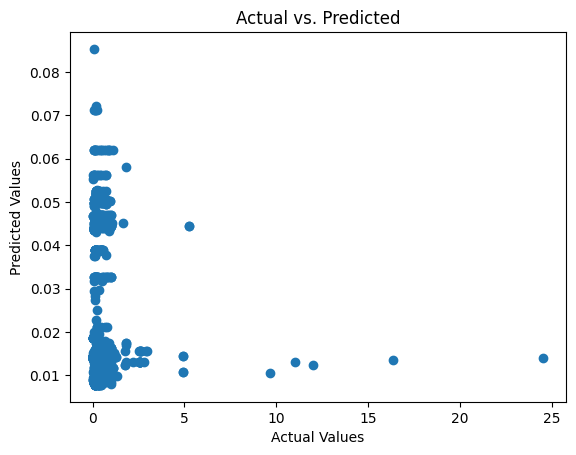

ypred1 Mean Absolute Error: 0.3309978726885245
ypred1 Root Mean Squared Error: 0.9102307555106866


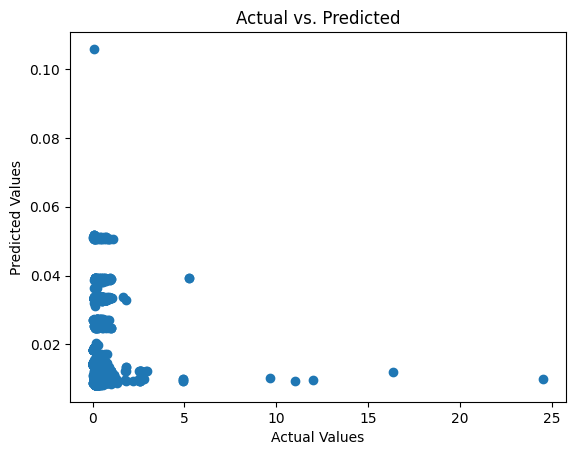

ypred3 Mean Absolute Error: 0.32994127486210595
ypred3 Root Mean Squared Error: 0.9097576260910395


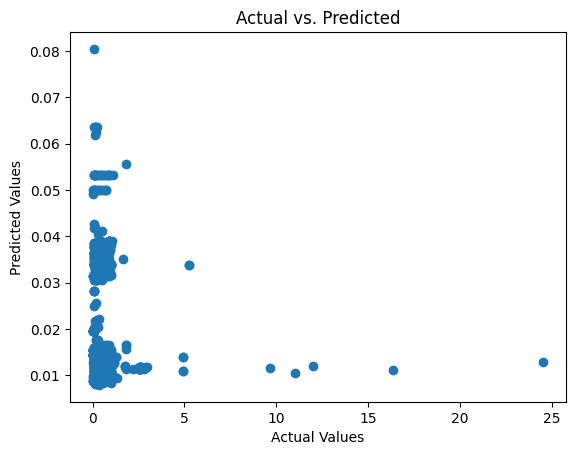

In [112]:
#RandomForestRegressor, DecisionTreeRegressor, DecisionTreeClassifier의 hyparameter를 일부 조절하며 5개의 모델을 생성해 학습
# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 => tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#model 100이 제일 나았음,,?
model100 = RandomForestRegressor(n_estimators=100, random_state=0)   # Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

model100.fit(X_train_minmax, y_train_minmax)
model100_5.fit(X_train_minmax, y_train_minmax)
model200.fit(X_train_minmax, y_train_minmax)

#X랑 y도 똑같이 전처리 process
preprocess(X_test)

#예측 모델
y_pred1 = model100.predict(X_test)
y_pred2 = model100_5.predict(X_test)
y_pred3 = model200.predict(X_test)

#evaluate
  #ypred1
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))

print("ypred1 Mean Absolute Error:", mae)
print("ypred1 Root Mean Squared Error:", rmse)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

  #ypred2

mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))

print("ypred1 Mean Absolute Error:", mae)
print("ypred1 Root Mean Squared Error:", rmse)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


  #ypred3
mae = mean_absolute_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))

print("ypred3 Mean Absolute Error:", mae)
print("ypred3 Root Mean Squared Error:", rmse)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()





# **모델 튜닝**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#version 1
# Defining hyperparameters w possible values#
#param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None, 5, 10, 20],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'max_features': ['auto', 'sqrt', 'log2']
#}

# Create the GridSearchCV object
#grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
#grid_search.fit(X_train_minmax, y_train_minmax)

# Get the best estimator
#best_rf_model = grid_search.best_estimator_

# Use the best model for predictions
#y_pred_best = best_rf_model.predict(X_test)

#shortened version 2
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_minmax, y_train_minmax.ravel())  # Use ravel() to convert to 1D array


# Get the best estimator
best_rf_model = grid_search.best_estimator_
 ### RandomForestRegressor(max_depth=5, max_features='log2', min_samples_leaf=4, min_samples_split=10, random_state=0)
# Use the best model for predictions
y_pred_best = best_rf_model.predict(X_test)

model = RandomForestRegressor(max_depth=5, max_features='log2', min_samples_leaf=4,
                      min_samples_split=10, random_state=0)   # Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest

model.fit(X_train_minmax, y_train_minmax.ravel())

#X랑 y도 똑같이 전처리 process
preprocess(X_test)

  #예측 모델
y_pred = model.predict(X_test)

  #evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.33215031543572554
Root Mean Squared Error: 0.9104679838063218


# **모델 블렌딩**

시간이 너무 오래 걸림... 오늘 안에 되냐?,,


# **XGBoost and LightGBM**

In [135]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import Pipeline

# Create a pipeline with the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Fit the XGBoost pipeline on training data
xgb_pipeline.fit(X_train, y_train)

# Predict using the XGBoost pipeline
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost Model - Mean Absolute Error:", mae_xgb)
print("XGBoost Model - Root Mean Squared Error:", rmse_xgb)

# Create a pipeline with the LightGBM model
lgb_model = lgb.LGBMRegressor(objective='regression', random_state=0)

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgb_model)
])

# Fit the LightGBM pipeline on training data
lgb_pipeline.fit(X_train, y_train)

# Predict using the LightGBM pipeline
y_pred_lgb = lgb_pipeline.predict(X_test)

# Evaluate LightGBM model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print("LightGBM Model - Mean Absolute Error:", mae_lgb)
print("LightGBM Model - Root Mean Squared Error:", rmse_lgb)


NameError: ignored

# **모델 스태킹(lightGBM, XGBoost)**

In [ ]:
from sklearn.ensemble import StackingRegressor

# Create a Stacking Regressor with XGBoost and LightGBM as base models
stacked_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_pipeline),
        ('lgb', lgb_pipeline)
    ],
    final_estimator=RandomForestRegressor(n_estimators=100, random_state=0)
)

# Fit the stacked model on training data
stacked_model.fit(X_train, y_train)

# Predict using the stacked model
y_pred_stacked = stacked_model.predict(X_test)

# Evaluate stacked model
mae_stacked = mean_absolute_error(y_test, y_pred_stacked)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))

print("Stacked Model - Mean Absolute Error:", mae_stacked)
print("Stacked Model - Root Mean Squared Error:", rmse_stacked)


# **모델 시각화**

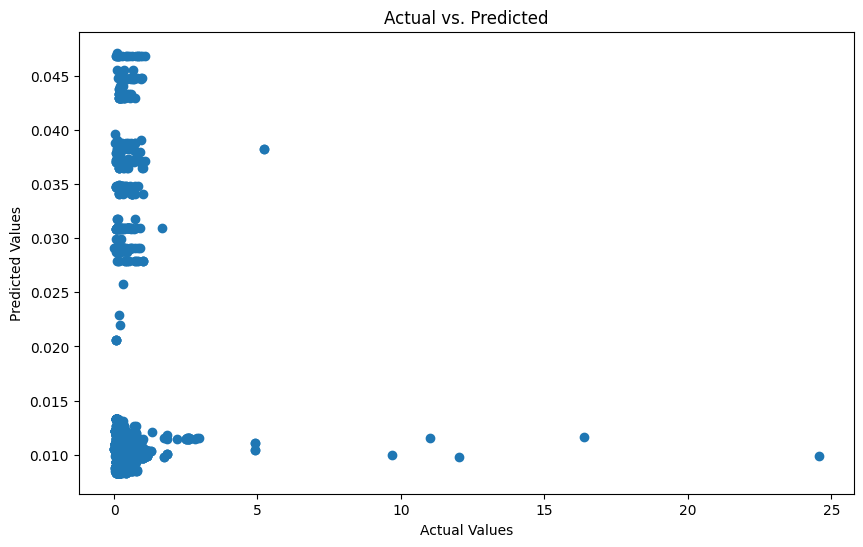

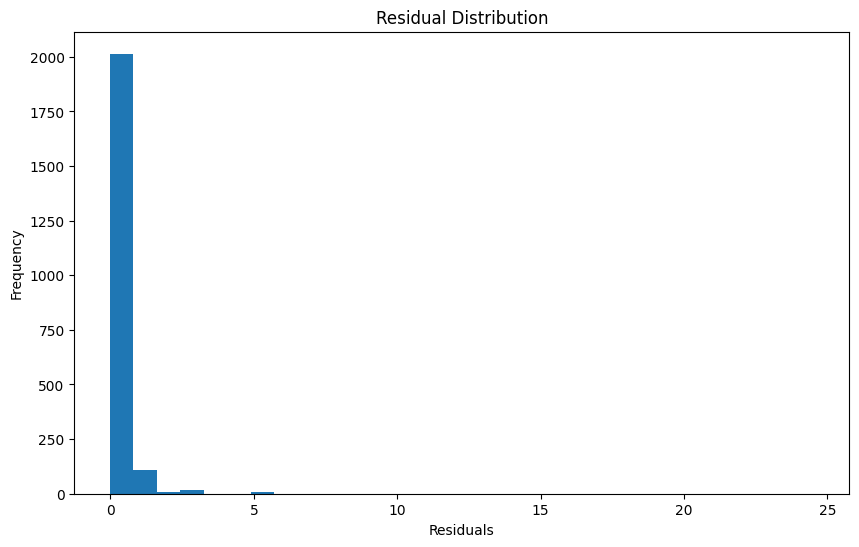

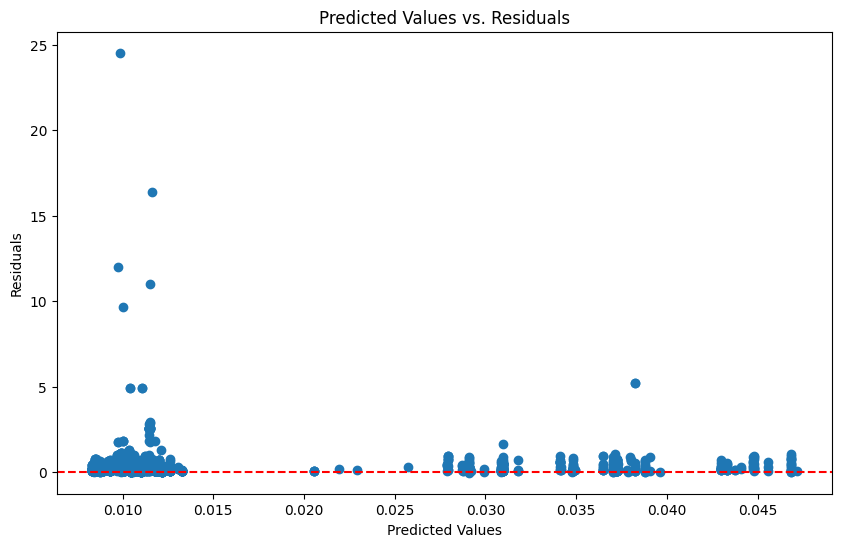

In [130]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()

# Histogram of the residuals (difference between actual and predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

# Scatter plot of predicted values vs. residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.show()

# **파이프라인_final version**

# **모델링 RAW**

In [ ]:
#RandomForestRegressor, DecisionTreeRegressor, DecisionTreeClassifier의 hyparameter를 일부 조절하며 5개의 모델을 생성해 학습
# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 => tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model100 = RandomForestRegressor(n_estimators=100, random_state=0)   # Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

model100.fit(X_train_minmax, y_train_minmax)
model100_5.fit(X_train_minmax, y_train_minmax)
model200.fit(X_train_minmax, y_train_minmax)

#X랑 y도 똑같이 전처리 process
preprocess(X_test, y_test)

#예측 모델
y_pred1 = model100.predict(X_test)
y_pred2 = model100_5.predict(X_test)
y_pred3 = model200.predict(X_test)

#evaluate
  #ypred1
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))

print("ypred1 Mean Absolute Error:", mae)
print("ypred1 Root Mean Squared Error:", rmse)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


  #ypred2
mae = mean_absolute_error(y_test, y_pred2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred2))

print("ypred1 Mean Absolute Error:", mae)
print("ypred1 Root Mean Squared Error:", rmse)
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()


  #ypred3
mae = mean_absolute_error(y_test, y_pred3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred3))

print("ypred3 Mean Absolute Error:", mae)
print("ypred3 Root Mean Squared Error:", rmse)

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.show()



In [81]:
#ypred1 랜덤포레스트 n_estimators 100
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)
  acc = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print(acc, cm)

  from sklearn.metrics import mean_absolute_error
  # Calculate MAE
  mae = mean_absolute_error(y_test, ypred1)
  print("Mean Absolute Error:", mae)


import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

#ypred 2 # n_estimator 100 max_depth 5
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)


#ypred3 n_estimator 200
import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred3 = model200.predict(X_test)
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred3[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()



ValueError: ignored

In [ ]:
#RandomForestRegressor, DecisionTreeRegressor, DecisionTreeClassifier의 hyparameter를 일부 조절하며 5개의 모델을 생성해 학습
# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 => tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model100 = RandomForestRegressor(n_estimators=100, random_state=0)   # Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

#ypred1 랜덤포레스트 n_estimators 100
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

#ypred 2 # n_estimator 100 max_depth 5
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)


#ypred3 n_estimator 200
import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred3 = model200.predict(X_test)
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred3[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()




# **파이프라인**

In [ ]:
#pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

class FloodPipeline():
    def __init__(self):
        self.model = None

    def load_data(self):
        df = pd.read_excel('./230814_v2.xlsx')
        df = df.dropna(axis=0, how='any')
        df['month'] = df['날짜'].dt.month
        df['day'] = df['날짜'].dt.day
        return df

    def preprocess_data(self, df):
        col = ['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율', '복개하천개수',
               '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', '교통사고', 'MAX_하수관로비율']
        stand_scale = StandardScaler()
        minmax_scale = MinMaxScaler()
        df_scaled = df.copy()
        df_scaled[col] = stand_scale.fit_transform(df_scaled[col])
        df_scaled[col] = minmax_scale.fit_transform(df_scaled[col])
        X = df_scaled.iloc[:, 0:40]
        y = df_scaled.iloc[:, 40]
        return X, y

    def split_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        self.model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

    def evaluate(self, y_test, y_pred):
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        return acc, cm

pipeline = FloodPipeline()
df = pipeline.load_data()
X, y = pipeline.preprocess_data(df)
X_train, X_test, y_train, y_test = pipeline.split_data(X, y)
pipeline.train_model(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc, cm = pipeline.evaluate(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion Matrix:\n{cm}')


# **230816**



In [2]:
df.isnull().sum().sort_values(ascending = False).head(40)

자치구(구)              0
날짜                  0
1hr 최대 강수량(mm)      0
일평균 강수량(mm)         0
경사도(˚)              0
해발고도(m)             0
불투수면(%)             0
녹지 면적율(%)           0
하천 면적율(%)           0
복개하천 개수(개)          0
맨홀 개수(개)            0
빗물받이 개수(개)          0
빗물 펌프 개수(개)         0
사고[건]               0
[MAX] 하수관로 비율(%)    0
침수 피해(0/1)          0
dtype: int64

In [ ]:
#변수 간 상관관계
df_corr = df.corr()

In [ ]:
df_corr_sort = df_corr.sort_values('하수수위', ascending = False)
df_corr_sort['하수수위'].head(30)

하수수위        1.000000
1hr 강수량     0.114921
빗물펌프        0.110345
일평균 강수량     0.100047
자치구_광진구     0.097623
자치구_강서구     0.095227
자치구_강남구     0.093212
Year        0.078476
맨홀          0.065325
자치구_노원구     0.062051
빗물받이        0.053844
교통사고        0.052193
하천          0.045385
녹지          0.042581
자치구_중랑구     0.032731
자치구_마포구     0.021244
Month       0.015647
자치구_동대문구    0.013700
자치구_성동구     0.009846
불투수면        0.008086
자치구_성북구     0.006164
Day         0.000223
자치구_영등포구   -0.004260
자치구_동작구    -0.009915
자치구_서대문구   -0.014811
자치구_도봉구    -0.015751
자치구_강동구    -0.019137
자치구_서초구    -0.022259
자치구_금천구    -0.022650
자치구_양천구    -0.026033
Name: 하수수위, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:

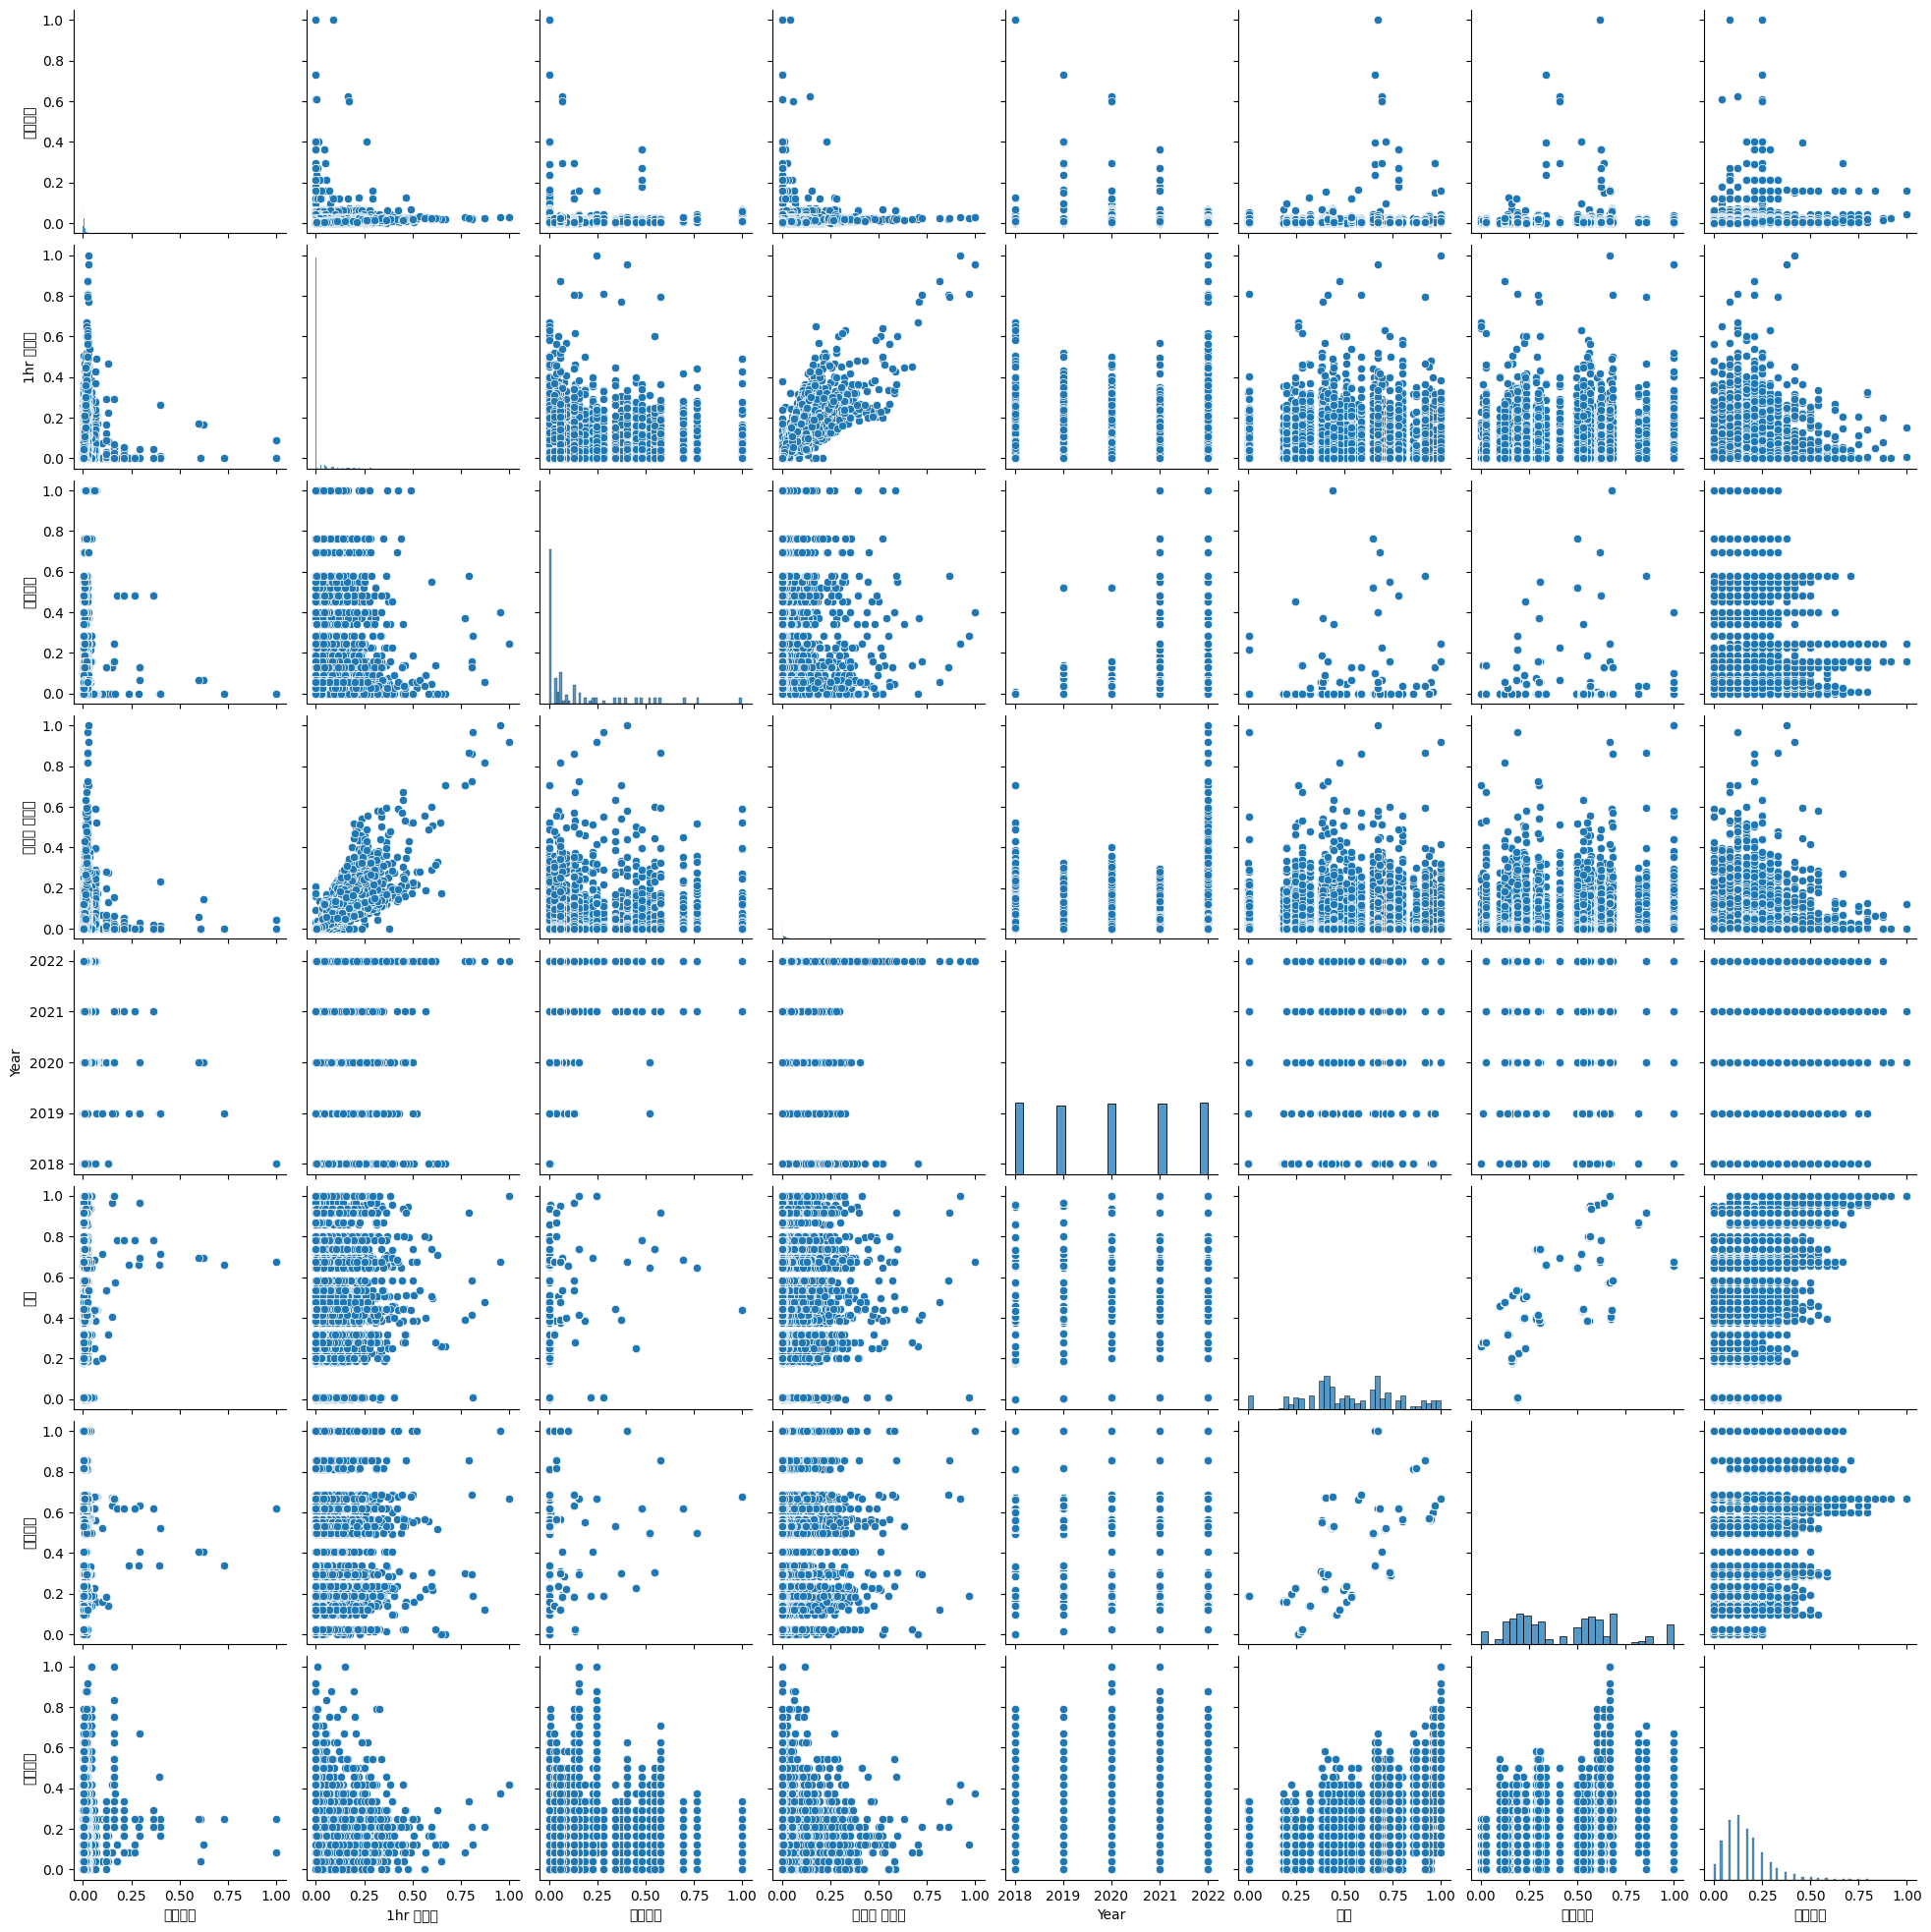

In [ ]:
import seaborn as sns
#관련 있는 9개 변수 나열
cols = ['하수수위','1hr 강수량','빗물펌프', '일평균 강수량','Year','맨홀','빗물받이', '교통사고']
sns.pairplot(df[cols])
plt.show()

In [ ]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Malgun' in i.name:
        print(i.name, i.fname)

import platform
1
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_n,ame)
    sns.set(font = 'Malgun Gothic', rc = {'font.family':font_name})
else:
    print('Unknown system... sorry')

SyntaxError: ignored

In [ ]:
#관련도 높은 변수만 모아서 모델 학습 시작
cols_train_0 = ['1hr 강수량','빗물펌프', '일평균 강수량','Year','맨홀','빗물받이', '교통사고']
cols_train= ['1hr 강수량', '고도', '빗물펌프', '하천', '불투수면', 'Month', '맨홀']
X_train_pre = df[cols_train]
y = df['하수수위'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)


In [ ]:
#모델 만들기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(50, input_dim = 7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='adam', loss = 'mean_squared_error')
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 20)

modelpath = "./flooding.hdf5"

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 200, batch_size =32, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/200
213/213 [==============================] - 1s 3ms/step - loss: 7.3811e-04 - val_loss: 8.8101e-04
Epoch 2/200
213/213 [==============================] - 1s 3ms/step - loss: 7.3628e-04 - val_loss: 8.7761e-04
Epoch 3/200
213/213 [==============================] - 1s 3ms/step - loss: 7.3549e-04 - val_loss: 8.8993e-04
Epoch 4/200
213/213 [==============================] - 1s 4ms/step - loss: 7.3691e-04 - val_loss: 8.8083e-04
Epoch 5/200
213/213 [==============================] - 1s 3ms/step - loss: 7.3526e-04 - val_loss: 8.8084e-04
Epoch 6/200
213/213 [==============================] - 1s 3ms/step - loss: 7.3692e-04 - val_loss: 8.7784e-04
Epoch 7/200
213/213 [==============================] - 1s 2ms/step - loss: 7.3494e-04 - val_loss: 8.8436e-04
Epoch 8/200
213/213 [==============================] - 0s 2ms/step - loss: 7.3782e-04 - val_loss: 8.7808e-04
Epoch 9/200
213/213 [==============================] - 0s 2ms/step - loss: 7.3560e-04 - val_loss: 8.8264e-04
Epoch 10/200
213/21

In [ ]:
#모델의 정확도는 89.9%정도됨
print('Accuracy:'%(model.evaluate(X,y)[1]))
print('loss: '%(model.evaluate(X,y)[0]))

InvalidArgumentError: ignored

In [ ]:
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = Y_prediction[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

71/71 [==============================] - 0s 1ms/step
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.12, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.

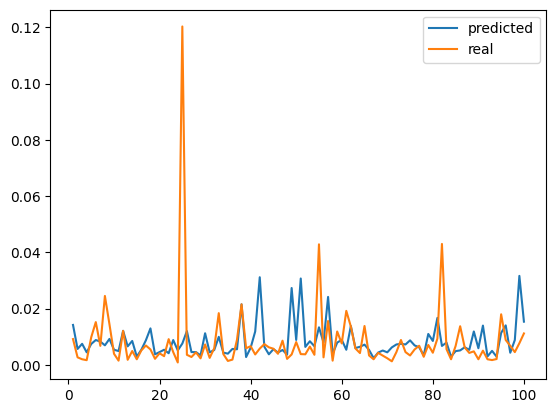

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

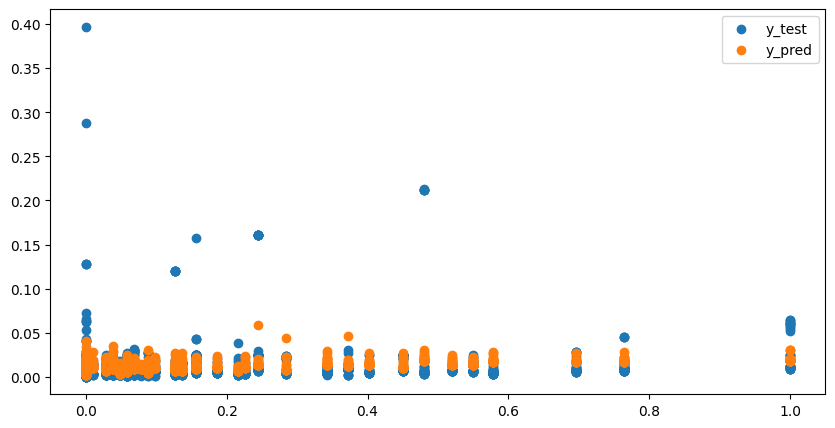

In [ ]:
#선형 회귀 모형
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)

plt.figure(figsize = (10,5))
plt.scatter(X_test['빗물펌프'], y_test, label = 'y_test')
plt.scatter(X_test['빗물펌프'], y_test_pred, label = 'y_pred')
plt.legend()
plt.show

In [ ]:
#RandomForestRegressor, DecisionTreeRegressor, DecisionTreeClassifier의 hyparameter를 일부 조절하며 5개의 모델을 생성해 학습
# 해당 데이터에 가장 적합한 hyparameter 옵션을 찾는 과정 => tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

model100 = RandomForestRegressor(n_estimators=100, random_state=0)   # Decision Tree 모델을 여러 개 모아서 만든 것 = Random Forest
model100_5 = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

#ypred1 랜덤포레스트 n_estimators 100
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

#ypred 2 # n_estimator 100 max_depth 5
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)


#ypred3 n_estimator 200
import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred3 = model200.predict(X_test)
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred3[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()


#pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

class FloodPipeline():
    def __init__(self):
        self.model = None

    def load_data(self):
        df = pd.read_excel('./230814_v2.xlsx')
        df = df.dropna(axis=0, how='any')
        df['month'] = df['날짜'].dt.month
        df['day'] = df['날짜'].dt.day
        return df

    def preprocess_data(self, df):
        col = ['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율', '복개하천개수',
               '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', '교통사고', 'MAX_하수관로비율']
        stand_scale = StandardScaler()
        minmax_scale = MinMaxScaler()
        df_scaled = df.copy()
        df_scaled[col] = stand_scale.fit_transform(df_scaled[col])
        df_scaled[col] = minmax_scale.fit_transform(df_scaled[col])
        X = df_scaled.iloc[:, 0:40]
        y = df_scaled.iloc[:, 40]
        return X, y

    def split_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        self.model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

    def evaluate(self, y_test, y_pred):
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        return acc, cm

pipeline = FloodPipeline()
df = pipeline.load_data()
X, y = pipeline.preprocess_data(df)
X_train, X_test, y_train, y_test = pipeline.split_data(X, y)
pipeline.train_model(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc, cm = pipeline.evaluate(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion Matrix:\n{cm}')


In [ ]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)

#model_dtc.fit(X_train, y_train)
model_dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

#ypred4 = model_dtc.predict(X_test)
ypred5 = model_dtr.predict(X_test)

71/71 [==============================] - 0s 1ms/step
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.12, 예측 침수: 0.07
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.

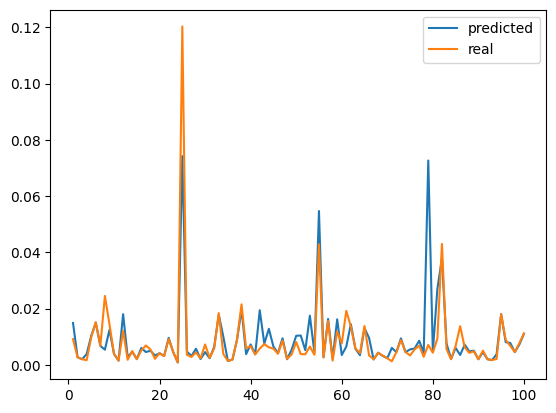

In [ ]:
#ypred 1
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
y_pred1 = model100.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = y_pred1[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

71/71 [==============================] - 0s 2ms/step
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.12, 예측 침수: 0.03
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.

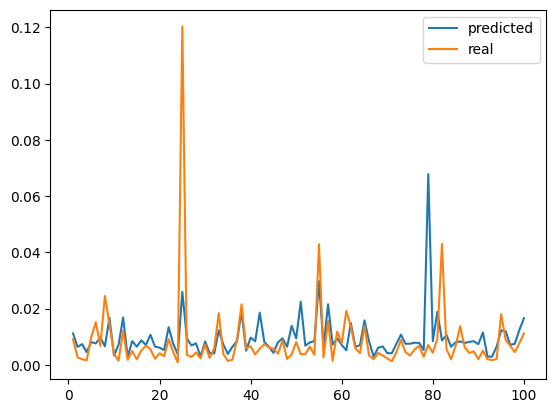

In [ ]:
#ypred2
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred2 = model100_5.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred2[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

71/71 [==============================] - 0s 1ms/step
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.12, 예측 침수: 0.08
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.

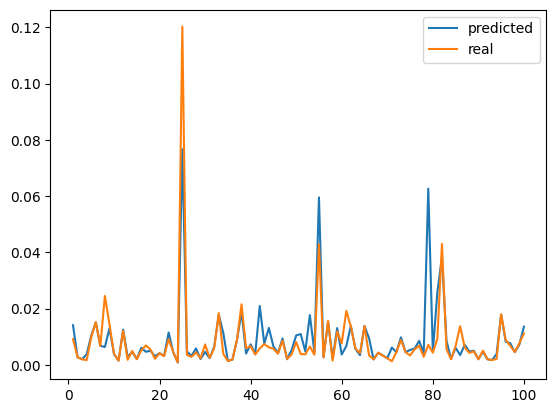

In [ ]:
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred3 = model200.predict(X_test)
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  prediction = ypred3[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

71/71 [==============================] - 0s 1ms/step
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.12, 예측 침수: 0.08
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.02
실제 침수: 0.00, 예측 침수: 0.01
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.00, 예측 침수: 0.00
실제 침수: 0.01, 예측 침수: 0.01
실제 침수: 0.02, 예측 침수: 0.

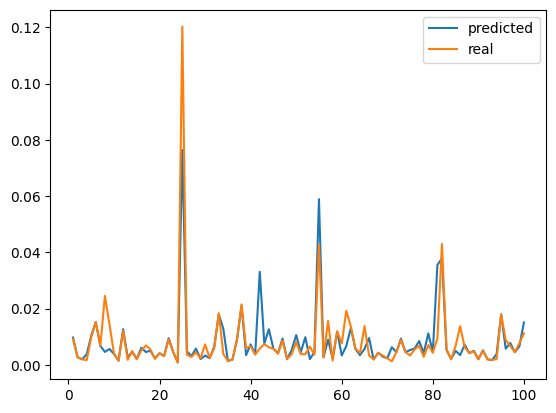

In [ ]:
#ypred5 decision tree regression 결정 트리 회귀 - 과적합 ㅠㅠ
real_flood = []
pred_flood =[]
X_num = []

n_iter = 0
ypred5 = model_dtr.predict(X_test).flatten()
Y_prediction = model.predict(X_test).flatten()
for i in range(100):
  real = y_test[i]
  ypred1 = model100.predict(X_test)
  prediction = ypred5[i]
  print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
  real_flood.append(real)
  pred_flood.append(prediction)
  n_iter+= 1
  X_num.append(n_iter)

import matplotlib.pyplot as plt
plt.plot(X_num, pred_flood, label = 'predicted')
plt.plot(X_num, real_flood, label = 'real')
plt.legend()
plt.show()

In [ ]:
from pandas.core.indexes.period import period_array
from pandas.io.formats.format import periods_per_day
#파이프라인 만들기

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

class floodPipeline():
  def __init__(self):
    self.model = None

  def load_data(self):
    df = pd.read_excel(f'./230814_v2.xlsx')
    #결측치 제거
    df = df.dropna(axis = 0, how= 'any')
    df['month'] = df['날짜'].dt.month
    df['day'] = df['날짜'].dt.day
    #기존 데이터와 합치고 훈련데이터 등 분리

  def preprocess_data(self, X,y):
    #scaling
    col = ['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율', '복개하천개수',
          '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', 'MAX_하수관로비율']
    stand_scale = StandardScaler()
    minmax_scale = MinMaxScaler()
    df_standard = df.copy()
    df_minmax = df.copy()
    df_standard[col] = stand_scale.fit_transform(df_standard[col])
    df_minmax[col] = minmax_scale.fit_transform(df_minmax[col])

  def split_data(self, X,y):
    X = df.iloc[:,0:40]
    y = df.iloc[:,40]
    cols_train_0 = ['1hr 강수량','빗물펌프', '일평균 강수량','Year','맨홀','빗물받이', '교통사고']
    cols_train= ['1hr 강수량', '고도', '빗물펌프', '하천', '불투수면', 'Month', '맨홀']
    X_train_pre = df[cols_train]
    y = df['하수수위'].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
    return X_train, X_test, y_train, y_test

  def train_model(self, X_train, y_train):
    self.model = LogisticRegression(max_iter = 1000)
    self.model = RandomForestRegressor(n_estimators=100, max_depth = 5, random_state=0)
    self.model.fit(X_train, y_train)

  def predict(self, X_test):
    y_pred = self.model.predict(X_test)
    real_flood = []
    pred_flood =[]
    X_num = []
    n_iter = 0
    ypred = model.predict(X_test).flatten()
    Y_prediction = model.predict(X_test).flatten()
    for i in range(100):
      real = y_test[i]
      prediction = ypred2[i]
      print('실제 침수: {:.2f}, 예측 침수: {:.2f}'.format(real, prediction))
      real_flood.append(real)
      pred_flood.append(prediction)
      n_iter+= 1
      X_num.append(n_iter)
    plt.plot(X_num, pred_flood, label = 'predicted')
    plt.plot(X_num, real_flood, label = 'real')
    plt.legend()
    plt.show()

  def evaluate(self, y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    return acc, cm

pipeline = floodPipeline()
X,y = pipeline.load_data
X_train, X_test, y_train, y_test = pipeline.preprocess_data(X,y)
pipeline.train_model(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc, cm = pipeline.evaluate(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion Matrix: {cm}')

IndentationError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix

class FloodPipeline():
    def __init__(self):
        self.model = None

    def load_data(self):
        df = pd.read_excel('./230814_v2.xlsx')
        df = df.dropna(axis=0, how='any')
        df['month'] = df['날짜'].dt.month
        df['day'] = df['날짜'].dt.day
        return df

    def preprocess_data(self, df):
        col = ['1hr_최대강수량', '일평균강수량', '경사도', '해발고도', '불투수면', '녹지면적율', '하천면적율', '복개하천개수',
               '맨홀개수', '빗물받이개수', '빗물펌프개수', 'AVG_하수관로비율', '교통사고', 'MAX_하수관로비율']
        stand_scale = StandardScaler()
        minmax_scale = MinMaxScaler()
        df_scaled = df.copy()
        df_scaled[col] = stand_scale.fit_transform(df_scaled[col])
        df_scaled[col] = minmax_scale.fit_transform(df_scaled[col])
        X = df_scaled.iloc[:, 0:40]
        y = df_scaled.iloc[:, 40]
        return X, y

    def split_data(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
        return X_train, X_test, y_train, y_test

    def train_model(self, X_train, y_train):
        self.model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

    def evaluate(self, y_test, y_pred):
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        return acc, cm

pipeline = FloodPipeline()
df = pipeline.load_data()
X, y = pipeline.preprocess_data(df)
X_train, X_test, y_train, y_test = pipeline.split_data(X, y)
pipeline.train_model(X_train, y_train)
y_pred = pipeline.predict(X_test)
acc, cm = pipeline.evaluate(y_test, y_pred)
print(f'Accuracy: {acc}')
print(f'Confusion Matrix:\n{cm}')
